# Analysis using SQL

In [118]:
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt


pysqldf = lambda q: sqldf(q, globals())

### Importing database.
Here the database was imported from the desktop. Code for reading csv file is provided below.

In [3]:
db = pd.read_csv('athlete_events.csv/athlete_events.csv')

### General information about the table.
Here after dtype conversion one can obtain type for all columns. There column 'Games' was transformed to string for future modifications.

In [53]:
def clear_games(y):
    return ''.join(list(x for x in list(y) if x.isnumeric() or x.isalpha()))


db['Games'] = pd.Series(clear_games(x) for x in db['Games'])
db = db.convert_dtypes()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  Int64  
 1   Name    271116 non-null  string 
 2   Sex     271116 non-null  string 
 3   Age     261642 non-null  Int64  
 4   Height  210945 non-null  Int64  
 5   Weight  208241 non-null  Float64
 6   Team    271116 non-null  string 
 7   NOC     271116 non-null  string 
 8   Games   271116 non-null  string 
 9   Year    271116 non-null  Int64  
 10  Season  271116 non-null  string 
 11  City    271116 non-null  string 
 12  Sport   271116 non-null  string 
 13  Event   271116 non-null  string 
 14  Medal   39783 non-null   string 
dtypes: Float64(1), Int64(4), string(10)
memory usage: 32.3 MB


In [193]:
pysqldf('SELECT * FROM db LIMIT 10;')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,NED,1994Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,NED,1994Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


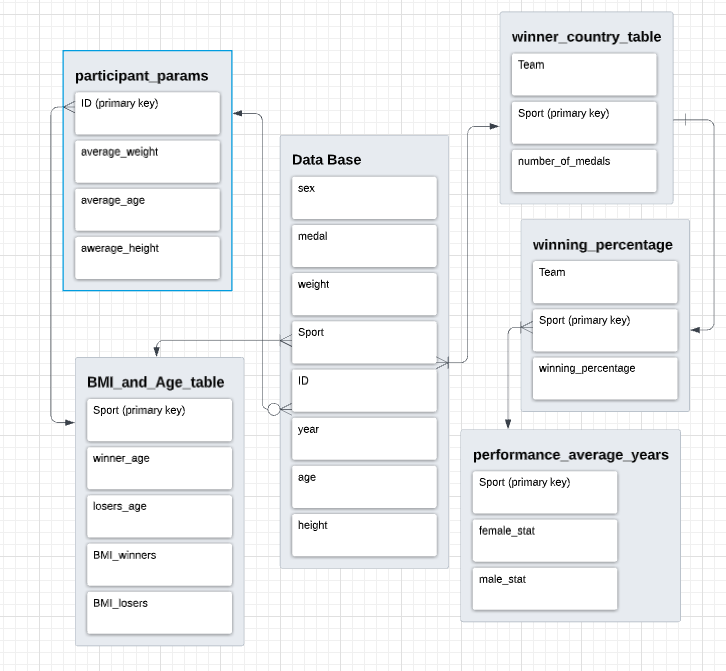

In [194]:
from IPython.display import display, Image
display(Image(filename='table.png'))

## Proposal:

There we will describe and explore the dataset of different sport activities, sportsmen and their achievements. The provided data is raw and misses some information about parametres of people, who participated in provided competitions.

At the beggining there are given only one table, consisting of unsorted data. By the queries, provided bellow, it will be divided into 3 other for future investigations.

###  Qestions to explore:
1. There is very common opinion that physical parametres affect on the performance significantly. Therefore, it is arguementative to explore the following qestion: Do the BMI coefficient or age affect on the performance? 
2. One may self-consistently suppose that each sportmen can not participate in the Olympic Games forever. So let's investigate the average number of playing years for men and women, depending on the kind of sport. 
3. Well, according to the official statistics Russian athletes show the best results in figure skating. Of course, it will be interesting to investingate other countries with their favourite sport (obviously, with enough number of respondents).

## Cleaning data.

### Can we trust the data about people's parametres.

First of all, we want to check is the data about height, age, and weight correct. One can clearly see that there is no different values for this parametres for each participant. Moreover, here we create table of the caracteristics for each person (ID is a primary key).

In [88]:
participants_params = pd.DataFrame(pysqldf(
    '''
    SELECT ID,
           AVG(Weight) AS average_weight, 
           AVG(Age) AS average_age, 
           AVG(Height) AS average_height
    FROM db
    GROUP BY ID
    '''
))

participants_params

,ID,average_weight,average_age,average_height
0,1,80.0,24.000000,180.0
1,2,60.0,23.000000,170.0
2,3,NaN,24.000000,NaN
3,4,NaN,34.000000,NaN
4,5,82.0,24.333333,185.0
...,...,...,...,...
135566,135567,72.0,26.000000,183.0
135567,135568,69.0,33.000000,171.0
135568,135569,89.0,29.000000,179.0
135569,135570,59.0,27.000000,176.0


Now we will count average age, when people show their best performance for each type of sport.

In [150]:
best_performance = pysqldf(
    '''
    SELECT p.ID, 
           p.average_weight AS weight,
           p.average_height AS height,
           p.average_age AS age,
           sp.Sport,
           sp.Team
    FROM participants_params p
    INNER JOIN
        (
            SELECT ID,
                   Sport,
                   Medal,
                   Team
            FROM db
            WHERE Medal IS NOT NULL
        ) AS sp
    ON p.ID == sp.ID;
    '''
)

best_performance

,ID,weight,height,age,Sport,Team
0,4,NaN,NaN,34.0,Tug-Of-War,Denmark/Sweden
1,15,NaN,NaN,27.6,Swimming,Finland
2,15,NaN,NaN,27.6,Swimming,Finland
3,16,85.0,184.0,28.0,Ice Hockey,Finland
4,17,64.0,175.0,30.0,Gymnastics,Finland
...,...,...,...,...,...,...
39778,135553,80.0,168.0,25.8,Athletics,Soviet Union
39779,135553,80.0,168.0,25.8,Athletics,Soviet Union
39780,135554,82.0,182.0,32.8,Fencing,Poland
39781,135563,64.0,171.0,21.0,Athletics,Russia


In [159]:
winner_counter = pd.DataFrame(pysqldf(
    '''
    SELECT COUNT(ID) AS number_of_winners,
           Sport,
           Team
    FROM best_performance
    GROUP BY Sport, Team
    '''
))

winner_country_table = pd.DataFrame(
    pysqldf(
        '''
        SELECT number_of_medals,
               t1.Sport,
               t2.Team
        FROM (
            SELECT MAX(number_of_winners) as number_of_medals,
                   Sport
            FROM winner_counter
            GROUP BY Sport
        ) AS t1
        INNER JOIN winner_counter t2
        ON number_of_medals == t2.number_of_winners AND t1.Sport == t2.Sport;
        '''
    )
)

winner_country_table

,number_of_medals,Sport,Team
0,1,Aeronautics,Switzerland
1,114,Alpine Skiing,Austria
2,12,Alpinism,Great Britain
3,69,Archery,South Korea
4,26,Art Competitions,Germany
...,...,...,...
75,16,Tug-Of-War,Sweden
76,141,Volleyball,Soviet Union
77,172,Water Polo,Hungary
78,62,Weightlifting,Soviet Union


We obtained countries with the best results for each kind of sport. Now let's count percentage of winning medals for them to understand how representive results are.

In [172]:
winning_percentage = pd.DataFrame(pysqldf(
    '''
        SELECT (number_of_medals * 1.0 / t.sum_of_winners) * 100 AS winning_percent,
               Team,
               w.Sport
        FROM winner_country_table w
        LEFT JOIN 
        (
            SELECT SUM(number_of_winners) AS sum_of_winners,
                   Sport
            FROM winner_counter
            GROUP BY Sport
        ) AS t
        ON w.Sport == t.Sport
        ORDER BY winning_percent DESC
        LIMIT 20;
    '''
))

winning_percentage

,winning_percent,Team,Sport
0,100.000000,Switzerland,Aeronautics
1,100.000000,Spain,Basque Pelota
2,100.000000,France,Croquet
3,100.000000,United States,Roque
4,85.714286,Gyrinus-1,Motorboating
5,66.666667,Great Britain,Jeu De Paume
6,50.000000,Devon and Somerset Wanderers,Cricket
7,50.000000,Union des Socits Franais de Sports Athletiques,Cricket
8,48.000000,Great Britain,Alpinism
9,40.000000,Great Britain,Racquets


As we can see, there are 4 countries with absolute winning rating (100%) in Aeronautics, Basque Pelota, Croquet and Roque. However, Russia is the leader in Rythmic Gymnastic with 34% of winning medals. 

In [174]:
pysqldf(
'''
    SELECT *
    FROM winning_percentage
    WHERE Team == 'Russia' OR Team == 'Soviet Union';
'''
)

,winning_percent,Team,Sport
0,34.090909,Russia,Rhythmic Gymnastics


In [111]:
average_params_of_performance = pd.DataFrame(pysqldf(
    '''
        SELECT dp_winners.Sport,
               number_of_winners,
               dpl.number_of_losers,
               winner_age,
               dpl.losers_age,
               winner_height,
               dpl.losers_height,
               winner_weight,
               dpl.losers_weight,
               dpl.number_of_losers
        FROM ( 
                SELECT dp_winners.Sport,
                       AVG(age) AS winner_age,
                       AVG(height) AS winner_height,
                       AVG(weight) AS winner_weight,
                       COUNT(dp_winners.ID) AS number_of_winners
                FROM best_performance dp_winners
                GROUP BY dp_winners.Sport
            ) AS dp_winners
        LEFT JOIN
            (
                SELECT db.Sport,
                       AVG(age) AS losers_age,
                       AVG(height) AS losers_height,
                       AVG(weight) AS losers_weight,
                       COUNT(db.ID) AS number_of_losers
                FROM db
                WHERE Medal IS NULL
                GROUP BY db.Sport
            ) AS dpl
        ON dpl.Sport = dp_winners.Sport AND dpl.Sport IS NOT NULL
        ORDER BY winner_age DESC;
    '''
))

average_params_of_performance

,Sport,number_of_winners,number_of_losers,winner_age,losers_age,winner_height,losers_height,winner_weight,losers_weight
0,Roque,3,1.0,53.333333,NaN,NaN,NaN,NaN,NaN
1,Art Competitions,156,3422.0,42.378222,46.087016,174.000000,174.666667,75.666667,75.269231
2,Alpinism,25,NaN,38.812500,NaN,NaN,NaN,NaN,NaN
3,Equestrianism,965,5379.0,35.524273,34.210547,175.400000,174.200661,68.283560,67.722237
4,Polo,67,28.0,34.578462,37.280000,175.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
61,Boxing,944,5103.0,23.113140,23.054189,174.395634,172.526398,67.249313,64.869048
62,Short Track Speed Skating,284,1250.0,22.299567,22.889600,169.686131,170.203460,64.094891,64.359143
63,Diving,427,2415.0,22.036725,22.521323,165.638235,166.829114,58.694969,60.924823
64,Swimming,3048,20147.0,21.030293,20.511861,180.923197,178.197347,73.251005,70.182490


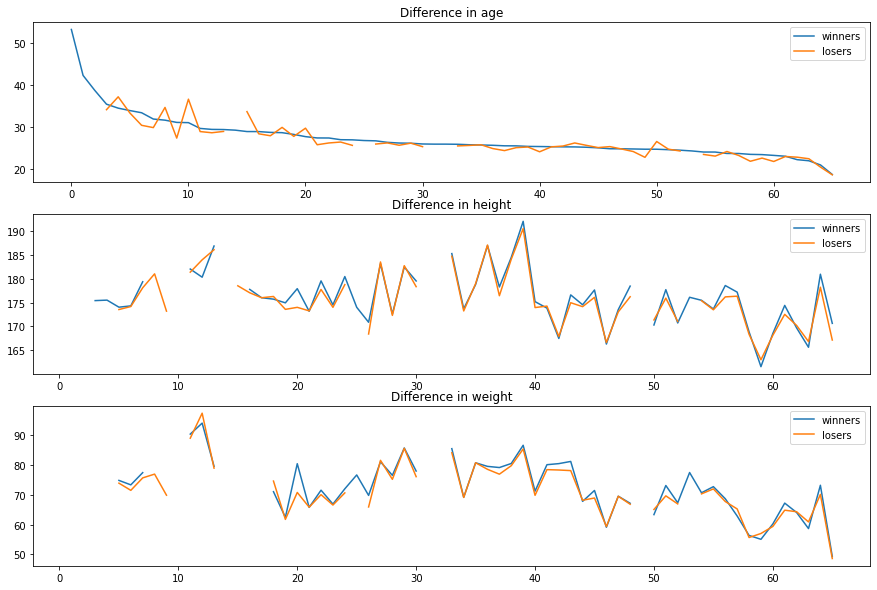

In [129]:
plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(3, 1, 1)
plt.plot(range(66), list(average_params_of_performance['winner_age']), label='winners')
plt.plot(range(66), list(average_params_of_performance['losers_age']), label='losers')
plt.title('Difference in age')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(range(66), list(average_params_of_performance['winner_height']), label='winners')
plt.plot(range(66), list(average_params_of_performance['losers_height']), label='losers')
plt.title('Difference in height')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(66), list(average_params_of_performance['winner_weight']), label='winners')
plt.plot(range(66), list(average_params_of_performance['losers_weight']), label='losers')
plt.title('Difference in weight')
plt.legend()

Now we have a table, providing average characteristics about winners and non winners for all kinds of sports. Let's count an average BMI for winners and losers to obtain and analyze its influence on the performance.

In [110]:
BMI_and_Age_table = pd.DataFrame(pysqldf('''
    SELECT Sport,
           winner_age,
           losers_age, 
           AVG(winner_weight / (winner_height * winner_height)) AS BMI_winners,
           AVG(losers_weight / (losers_height * losers_height)) AS BMI_losers
    FROM average_params_of_performance
    GROUP BY Sport;
'''))

BMI_and_Age_table

,Sport,winner_age,losers_age,BMI_winners,BMI_losers
0,Aeronautics,26.000000,NaN,NaN,NaN
1,Alpine Skiing,24.115017,23.146942,0.002414,0.002393
2,Alpinism,38.812500,NaN,NaN,NaN
3,Archery,31.180777,27.441860,0.002360,0.002331
4,Art Competitions,42.378222,46.087016,0.002499,0.002467
...,...,...,...,...,...
61,Tug-Of-War,29.513982,28.714286,0.002896,0.002881
62,Volleyball,25.724974,24.947650,0.002279,0.002247
63,Water Polo,25.967033,25.574924,0.002493,0.002468
64,Weightlifting,25.352437,25.547981,0.002871,0.002780


In [131]:
corr_age = BMI_and_Age_table['winner_age'].corr(BMI_and_Age_table['losers_age'])
corr_BMI = BMI_and_Age_table['BMI_winners'].corr(BMI_and_Age_table['BMI_losers'])

corr_age, corr_BMI

(0.9384877292595787, 0.9812283481429397)

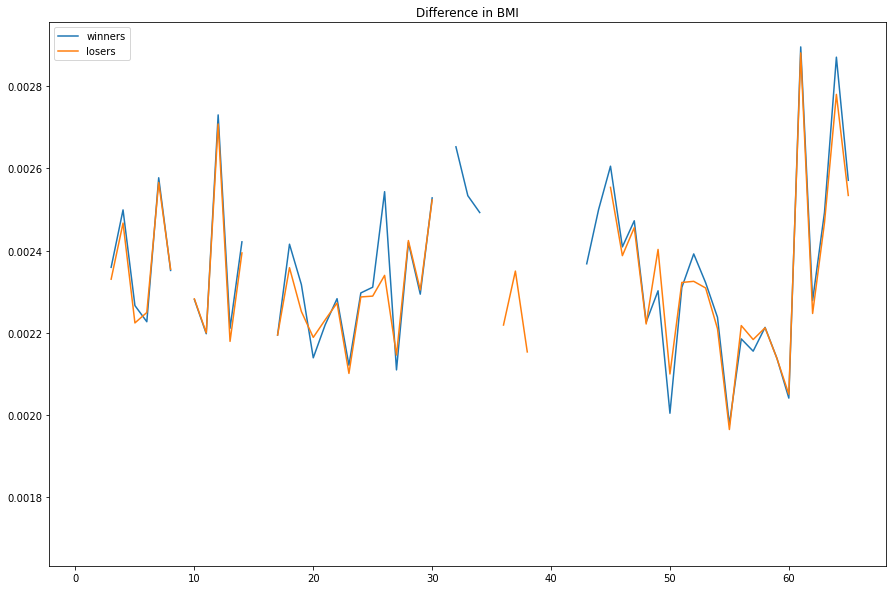

In [132]:
plt.subplot(1, 1, 1)
plt.plot(range(66), list(BMI_and_Age_table['BMI_winners']), label='winners')
plt.plot(range(66), list(BMI_and_Age_table['BMI_losers']), label='losers')
plt.title('Difference in BMI')
plt.legend()

As we can see through the correlation coefficient and the provided graphic, BMI and age do not affect on the performance of participants in any kind of sport.

Now we will count the average number of performances in each kind of sport, depending on sex of participant.

In [191]:
performance_count = pd.DataFrame(pysqldf(
'''
    SELECT COUNT(DISTINCT Year) AS years_of_performance,
           Sex, 
           Sport,
           ID
    FROM db
    GROUP BY ID, Sport;
'''
))

performance_average_years = pd.DataFrame(pysqldf(
'''
   SELECT Sport,
          AVG(
          CASE 
            WHEN Sex == 'F' THEN average_years_of_performance
            ELSE NULL
          END
          ) AS female_stat,
          AVG(
          CASE 
            WHEN Sex == 'M' THEN average_years_of_performance
            ELSE NULL
          END
          ) AS male_stat
   FROM ( 
       SELECT AVG(years_of_performance) AS average_years_of_performance,
              Sex,
              Sport
       FROM performance_count
       GROUP BY Sex, Sport
   ) AS temp
   GROUP BY Sport
   ORDER BY female_stat, male_stat DESC;
'''
))

performance_average_years

,Sport,female_stat,male_stat
0,Nordic Combined,NaN,1.492562
1,Baseball,NaN,1.174770
2,Polo,NaN,1.080460
3,Tug-Of-War,NaN,1.062500
4,Rugby,NaN,1.045161
...,...,...,...
61,Cross Country Skiing,1.669456,1.505645
62,Speed Skating,1.674242,1.574953
63,Table Tennis,1.692308,1.817204
64,Trampolining,1.727273,1.551020


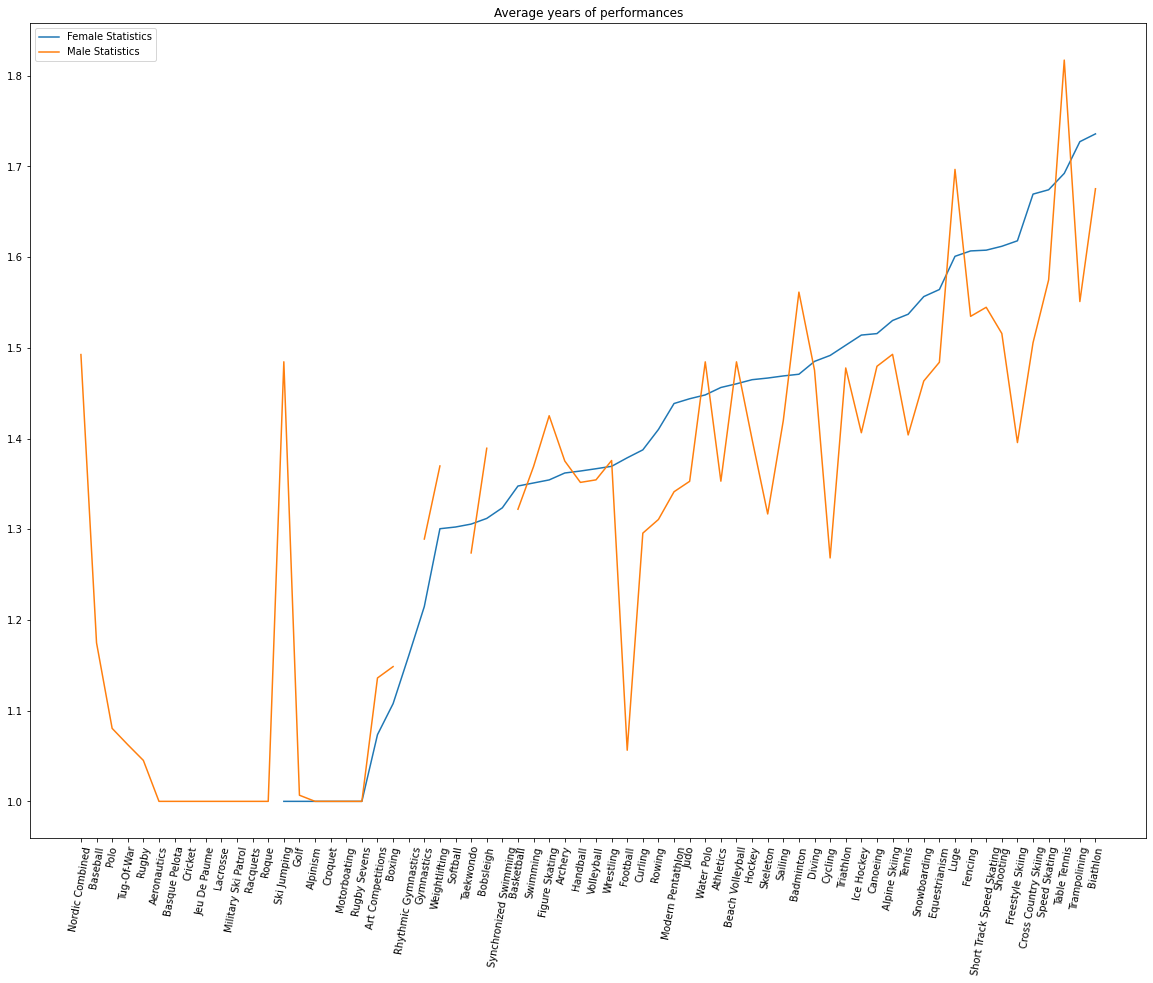

In [192]:
plt.rcParams["figure.figsize"] = (20, 15)

plt.subplot(1, 1, 1)

plt.plot(performance_average_years['Sport'], performance_average_years['female_stat'], label='Female Statistics')
plt.plot(performance_average_years['Sport'], performance_average_years['male_stat'], label='Male Statistics')
plt.title('Average years of performances')
plt.xticks(rotation=80)

plt.legend()